# SimpleRNN Test Code

> ## Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. SimpleRNN - without Normalization

> ## 1) Sample Data

- inputs 데이터 생성(100, 5, 1)

In [ ]:
X = [[[i + j] for i  in range(5)] for j in range(100)]

X[:3], X[-3: ]
# x(0, 1, 2, 3, 4) 뒤에 오는 y(5) 값을 맞추기 위한 모델이다.

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

- Outputs 데이터 생성(100, 1)

In [ ]:
y = [(i + 5) for i in range(100)]
y[:3], y[-3:]
# y는 5부터 시작하는 모델을 만들었다

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

- 80 : 20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state =2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary

- Unit(output_dim) : 3
- input_shape(input_length, input_dim) : (5, 1)
- return_sequences = False : 최종 unit만 출력
- layers.Dense(1) : y_hat

In [ ]:
from keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5, 1),      # 100개가 들어오는데, 5개씩 나눠서 들어와
                             return_sequences = False)) 
model_1.add(layers.Dense(1))
model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 62ms/step - loss: 3999.6318 - accuracy: 0.0000e+00 - val_loss: 3816.7000 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 4117.1942 - accuracy: 0.0000e+00 - val_loss: 3812.2317 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 4102.1076 - accuracy: 0.0000e+00 - val_loss: 3807.6328 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 4041.1364 - accuracy: 0.0000e+00 - val_loss: 3802.6499 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 3928.9150 - accuracy: 0.0000e+00 - val_loss: 3795.3672 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 3904.8213 - accuracy: 0.0000e+00 - val_loss: 3774.3503 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - lo

### (4) Model Predict

In [ ]:
y_hat = model_1.predict(X_test)

### (5) 학습 결과 시각화

- Loss 감소

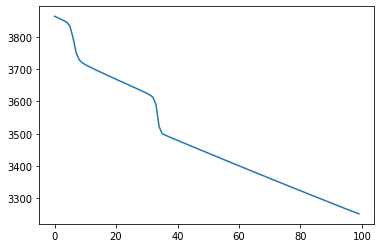

In [ ]:
plt.plot(hist_1.history['loss'])
plt.show()

- 학습 되지 않음
   - 녹색 -> 정답(y_test)
   - 적색 -> 예측(y_hat)

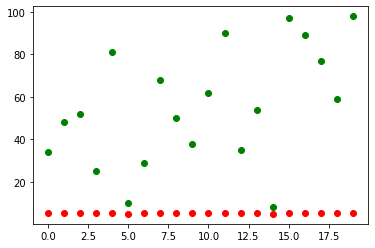

In [ ]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# 2. SimpleRNN - with Normalization

- 속도도 빨라진다

> ## 1) Sample Data - with Normalization

In [ ]:
X = [[[i + j] for i  in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

- 80 : 20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state =2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary

- None : input_length 자동 맞춤

In [ ]:
from keras import models, layers

model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_2.add(layers.Dense(1))
model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_2.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
hist_2 = model_2.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.0268 - accuracy: 0.0171 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.0518 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.0134 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.0367 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 0.0099 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.0101 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 0.0281 - val_loss: 0.0029 - val_accur

### (4) Model Predict

In [ ]:
y_hat = model_2.predict(X_test)

### (5) 학습 결과 시각화

- Loss 감소

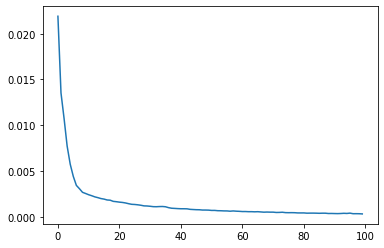

In [ ]:
plt.plot(hist_2.history['loss'])
plt.show()

- 학습 진행
   - 녹색 -> 정답(y_test)
   - 적색 -> 예측(y_hat)

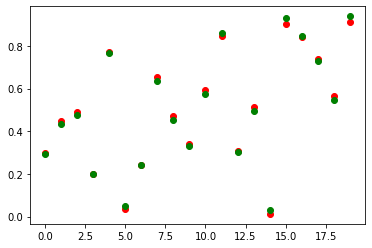

In [ ]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()
# y축이 변화 됐다. 

# 3. Stacked_SimpleRNN

- Stacked : 쌓는다 

### (1) Model Define & Summary

- return_sequences = True : 중간 단계 결과가 출력

In [ ]:
from keras import models, layers

model_3 = models.Sequential(name = 'Stacked_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = True))
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_3.add(layers.Dense(1))
model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_3.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
hist_3 = model_3.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 2.1423 - accuracy: 0.0035 - val_loss: 1.7738 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1.6059 - accuracy: 0.0066 - val_loss: 1.3545 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.1923 - accuracy: 0.0066 - val_loss: 1.0459 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0762 - accuracy: 0.0174 - val_loss: 0.8161 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8111 - accuracy: 0.0050 - val_loss: 0.6466 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6274 - accuracy: 0.0085 - val_loss: 0.5178 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.0035 - val_loss: 0.4149 - val_accur

### (4) Model Predict

In [ ]:
y_hat = model_3.predict(X_test)

### (5) 학습 결과 시각화

- Loss 감소

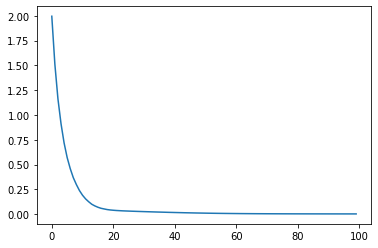

In [ ]:
plt.plot(hist_3.history['loss'])
plt.show()

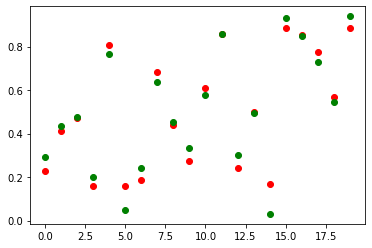

In [ ]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# 4. 'return_sequences' Output_Options

- 'input_length'에 대한 Sequance 전체를 출력할지 설정
   - 'False' vs. 'True'

> ## 1) 실습데이터 생성

In [ ]:
X = [[[i + j] for i  in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state =2045)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data

In [ ]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 3) False_Option

- 마지막 Output만 출력
   - Unit -> 1

In [ ]:
model_false = models.Sequential()
model_false.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1),
                                 return_sequences = False)) # unit 1개, input이 5개지만 마지막 결과만 나온다
                                
model_false.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])
# DNN layer는 빼고, RNN만 남겼다

In [ ]:
model_false.predict(X_test[0].reshape(1, 5, 1)) # output이 하나만 나온다

array([[-1.]], dtype=float32)

- 마지막 Output만 출력
   - Unit -> 3

In [ ]:
model_false = models.Sequential()
model_false.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1),
                                 return_sequences = False))
                                
model_false.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])



In [ ]:
model_false.predict(X_test[0].reshape(1, 5, 1)) # 노드 당 마지막 결과만 하나씩 나온다

array([[ 1.,  1., -1.]], dtype=float32)

> ## 4) True_Option
- 매 순환마다 Output만 출력
   - Unit -> 1
   - input_length -> 5

In [ ]:
model_true = models.Sequential()
model_true.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1),
                                 return_sequences = True)) # unit은 하나지만, input이 5개니까 5번 학습한 결과 5개가 다 나온다
                                
model_true.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_true.predict(X_test[0].reshape(1, 5, 1)) # 하나의 노드에서 input data 다섯개의 결과 다 나온다

array([[[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]], dtype=float32)

- 매 순환마다 Output만 출력
   - Unit -> 3
   - input_length -> 5

In [ ]:
model_true = models.Sequential()
model_true.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1),
                                 return_sequences = True))
                                
model_true.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
model_true.predict(X_test[0].reshape(1, 5, 1))
# 노드당 반복된 결과 전부 나오니까 15개 출력력

array([[[-1.        ,  1.        ,  0.3861467 ],
        [-1.        ,  1.        , -0.09015364],
        [-1.        ,  1.        ,  0.09878136],
        [-1.        ,  1.        ,  0.04352054],
        [-1.        ,  1.        ,  0.07779116]]], dtype=float32)

###
#The End
###